In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Build Basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | buraydah
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | finschhafen
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | umm kaddadah
Processing Record 14 of Set 1 | egvekinot
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | pochutla
Processing Record 19 of Set 1 | sulina
Processing Record 20 of Set 1 | shilka
Proces

Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | marsabit
Processing Record 44 of Set 4 | san rafael
Processing Record 45 of Set 4 | marzuq
Processing Record 46 of Set 4 | terney
Processing Record 47 of Set 4 | the pas
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | walvis bay
Processing Record 50 of Set 4 | port blair
Processing Record 1 of Set 5 | lata
Processing Record 2 of Set 5 | burnie
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | barsovo
Processing Record 5 of Set 5 | moyale
Processing Record 6 of Set 5 | balaipungut
Processing Record 7 of Set 5 | bonthe
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | vestmannaeyjar
Processing Record 10 of Set 5 | rio brilhante
Processing Record 11 of Set 5 | dawei
Processing Record 12 of Set 5 | komsomolskiy
Pro

Processing Record 28 of Set 8 | wagrowiec
Processing Record 29 of Set 8 | seryshevo
Processing Record 30 of Set 8 | neiafu
Processing Record 31 of Set 8 | broken hill
Processing Record 32 of Set 8 | mogadishu
Processing Record 33 of Set 8 | villarrica
Processing Record 34 of Set 8 | pierreville
Processing Record 35 of Set 8 | amapa
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | chuy
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | laishevo
Processing Record 40 of Set 8 | debre sina
Processing Record 41 of Set 8 | tres arroyos
Processing Record 42 of Set 8 | buala
Processing Record 43 of Set 8 | kisangani
Processing Record 44 of Set 8 | jacareacanga
Processing Record 45 of Set 8 | waitati
Processing Record 46 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 47 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 48 of Set 8 | vigrestad
Processing Record 49 of Set 8 | ketchikan
Processing Record 50 of 

Processing Record 14 of Set 12 | san fernando
Processing Record 15 of Set 12 | taldan
Processing Record 16 of Set 12 | barrhead
Processing Record 17 of Set 12 | okato
Processing Record 18 of Set 12 | kemijarvi
Processing Record 19 of Set 12 | rungata
City not found. Skipping...
Processing Record 20 of Set 12 | bangkal
Processing Record 21 of Set 12 | qiongshan
Processing Record 22 of Set 12 | aginskoye
Processing Record 23 of Set 12 | ullapool
Processing Record 24 of Set 12 | aranda de duero
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | alofi
Processing Record 27 of Set 12 | saint-jerome
Processing Record 28 of Set 12 | dandong
Processing Record 29 of Set 12 | almaznyy
Processing Record 30 of Set 12 | takoradi
Processing Record 31 of Set 12 | misawa
Processing Record 32 of Set 12 | geraldton
Processing Record 33 of Set 12 | sorvag
City not found. Skipping...
Processing Record 34 of Set 12 | zheleznodorozhnyy
Processing Record 35 of Set 12 | itarema
Process

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,77.16,94,90,14.97,TO,2021-07-31 05:56:23
1,Port Elizabeth,-33.9180,25.5701,46.69,93,0,3.44,ZA,2021-07-31 05:52:46
2,Buraydah,26.3260,43.9750,88.25,9,93,7.18,SA,2021-07-31 05:56:24
3,Ushuaia,-54.8000,-68.3000,37.06,65,20,0.00,AR,2021-07-31 05:56:25
4,Rikitea,-23.1203,-134.9692,70.72,86,61,8.16,PF,2021-07-31 05:56:25
5,Avarua,-21.2078,-159.7750,73.45,68,40,10.36,CK,2021-07-31 05:56:25
6,Bredasdorp,-34.5322,20.0403,45.72,93,6,6.91,ZA,2021-07-31 05:56:26
7,Punta Arenas,-53.1500,-70.9167,37.51,75,0,10.36,CL,2021-07-31 05:56:26
8,Finschhafen,-6.6024,147.8681,82.09,74,100,8.50,PG,2021-07-31 05:56:27
9,Cape Town,-33.9258,18.4232,52.12,100,5,3.44,ZA,2021-07-31 05:56:27


In [10]:
new_column_order = ['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-07-31 05:56:23,-21.2000,-175.2000,77.16,94,90,14.97
1,Port Elizabeth,ZA,2021-07-31 05:52:46,-33.9180,25.5701,46.69,93,0,3.44
2,Buraydah,SA,2021-07-31 05:56:24,26.3260,43.9750,88.25,9,93,7.18
3,Ushuaia,AR,2021-07-31 05:56:25,-54.8000,-68.3000,37.06,65,20,0.00
4,Rikitea,PF,2021-07-31 05:56:25,-23.1203,-134.9692,70.72,86,61,8.16
...,...,...,...,...,...,...,...,...,...
535,Geraldton,AU,2021-07-31 05:58:04,-28.7667,114.6000,63.12,63,73,16.11
536,Zheleznodorozhnyy,RU,2021-07-31 06:01:32,55.7503,38.0042,72.14,55,14,11.14
537,Itarema,BR,2021-07-31 06:01:33,-2.9248,-39.9167,77.41,79,99,14.29
538,Kattivakkam,IN,2021-07-31 06:01:33,13.2167,80.3167,93.29,44,71,12.46


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

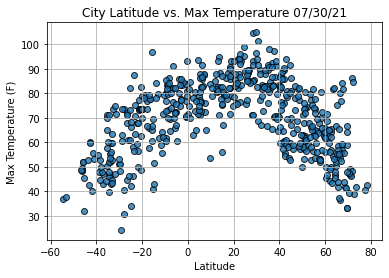

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

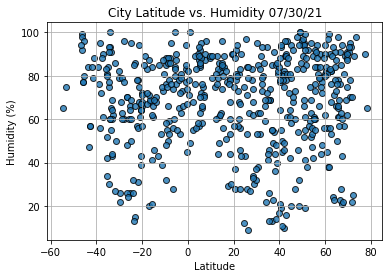

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

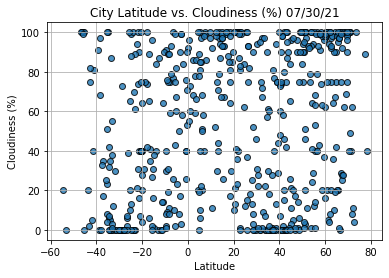

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

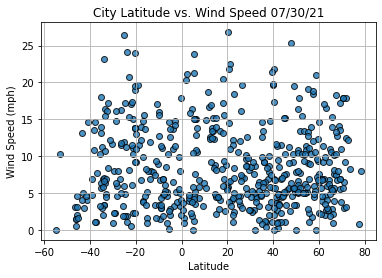

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
city_data_df = pd.read_csv("./weather_data/cities.csv")
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                   Rio Grande
Country                        BR
Date          2021-07-31 05:56:29
Lat                       -32.035
Lng                      -52.0986
Max Temp                    46.99
Humidity                       86
Cloudiness                      0
Wind Speed                   8.43
Name: 13, dtype: object

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Buraydah,SA,2021-07-31 05:56:24,26.3260,43.9750,88.25,9,93,7.18
10,10,Umm Kaddadah,SD,2021-07-31 05:56:28,13.6017,26.6876,81.72,61,97,13.40
11,11,Egvekinot,RU,2021-07-31 05:56:28,66.3167,-179.1667,36.36,91,100,5.21
12,12,Nikolskoye,RU,2021-07-31 05:56:28,59.7035,30.7861,62.40,81,97,12.33
14,14,Pochutla,MX,2021-07-31 05:56:29,15.7432,-96.4661,78.82,89,67,4.43


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

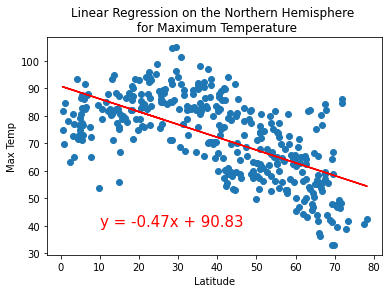

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

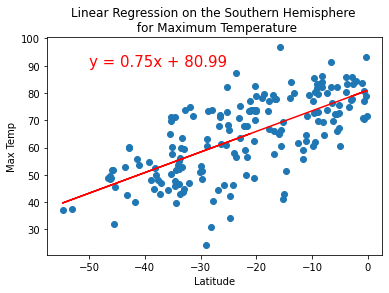

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

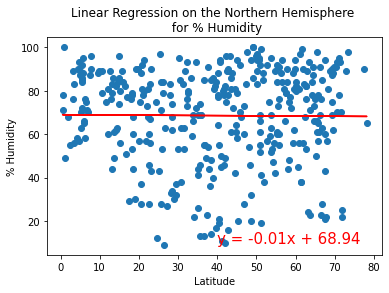

In [48]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

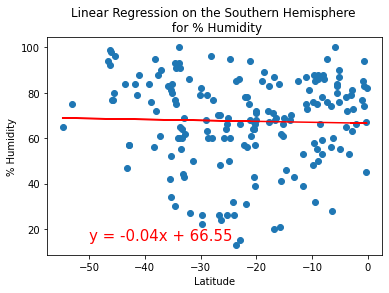

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

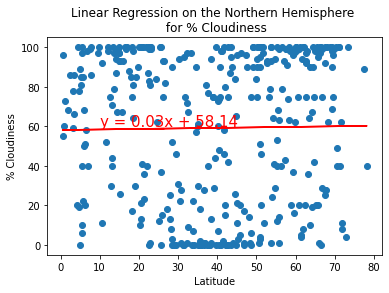

In [52]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

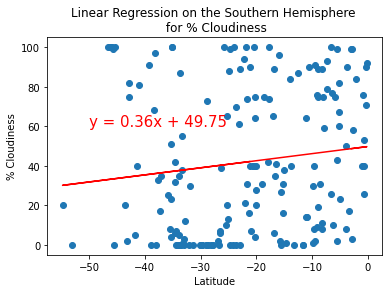

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

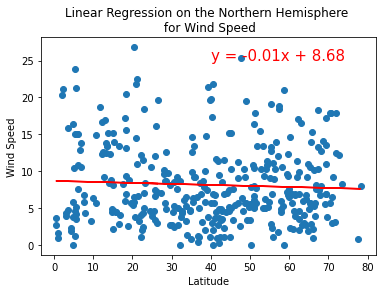

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

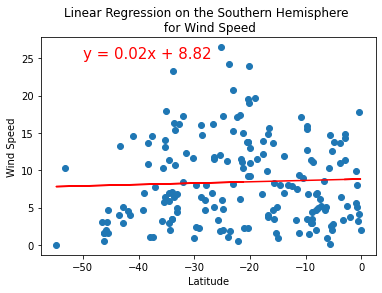

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))